In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv("Student_performance_data _ (2).csv")

# Display the first few rows of the dataset to verify loading
print(data.head())


   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

In [19]:
data['Passed'] = (data['GradeClass'] >= 3).astype(int)

# Flip the 'Passed' column (1 = Fail, 0 = Pass)
data['Passed'] = 1 - data['Passed']

# Drop non-feature columns (StudentID, GradeClass)
X = data.drop(['StudentID', 'GradeClass'], axis=1)
y = data['Passed']

In [20]:
for column in data.columns:
    print(f"Unique values in '{column}':")
    print(data[column].unique())
    print("\n")

# Count unique values for each column in the dataset
unique_counts = data.nunique()
print(unique_counts)

Unique values in 'StudentID':
[1001 1002 1003 ... 3390 3391 3392]


Unique values in 'Age':
[17 18 15 16]


Unique values in 'Gender':
[1 0]


Unique values in 'Ethnicity':
[0 2 1 3]


Unique values in 'ParentalEducation':
[2 1 3 4 0]


Unique values in 'StudyTimeWeekly':
[19.83372281 15.40875606  4.21056977 ...  6.80549964 12.41665266
 17.81990749]


Unique values in 'Absences':
[ 7  0 26 14 17 10 22  1 11 15 21  9 16 29  2 25 20  5  8 12 27 23  3 13
  6 28  4 18 19 24]


Unique values in 'Tutoring':
[1 0]


Unique values in 'ParentalSupport':
[2 1 3 4 0]


Unique values in 'Extracurricular':
[0 1]


Unique values in 'Sports':
[0 1]


Unique values in 'Music':
[1 0]


Unique values in 'Volunteering':
[0 1]


Unique values in 'GPA':
[2.92919559 3.04291483 0.11260225 ... 1.14233288 1.80329676 2.14001388]


Unique values in 'GradeClass':
[2. 1. 4. 3. 0.]


Unique values in 'Passed':
[1 0]


StudentID            2392
Age                     4
Gender                  2
Ethnicity           

C:\Users\hp\AppData\Local\Temp\ipykernel_15440\1086871079.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Passed', data=data, palette='Set2')


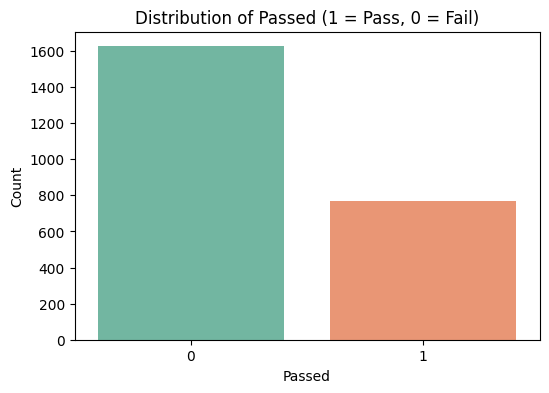

Passed
0    1625
1     767
Name: count, dtype: int64


In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Passed', data=data, palette='Set2')
plt.title('Distribution of Passed (1 = Pass, 0 = Fail)')
plt.xlabel('Passed')
plt.ylabel('Count')
plt.show()
print(data['Passed'].value_counts())

C:\Users\hp\AppData\Local\Temp\ipykernel_15440\2046842447.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Passed', y=col, data=data, palette='Set2')
C:\Users\hp\AppData\Local\Temp\ipykernel_15440\2046842447.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Passed', y=col, data=data, palette='Set2')
C:\Users\hp\AppData\Local\Temp\ipykernel_15440\2046842447.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Passed', y=col, data=data, palette='Set2')
C:\Users\hp\AppData\Local\Temp\ipykernel_15440\2046842447.py:10: FutureWarni

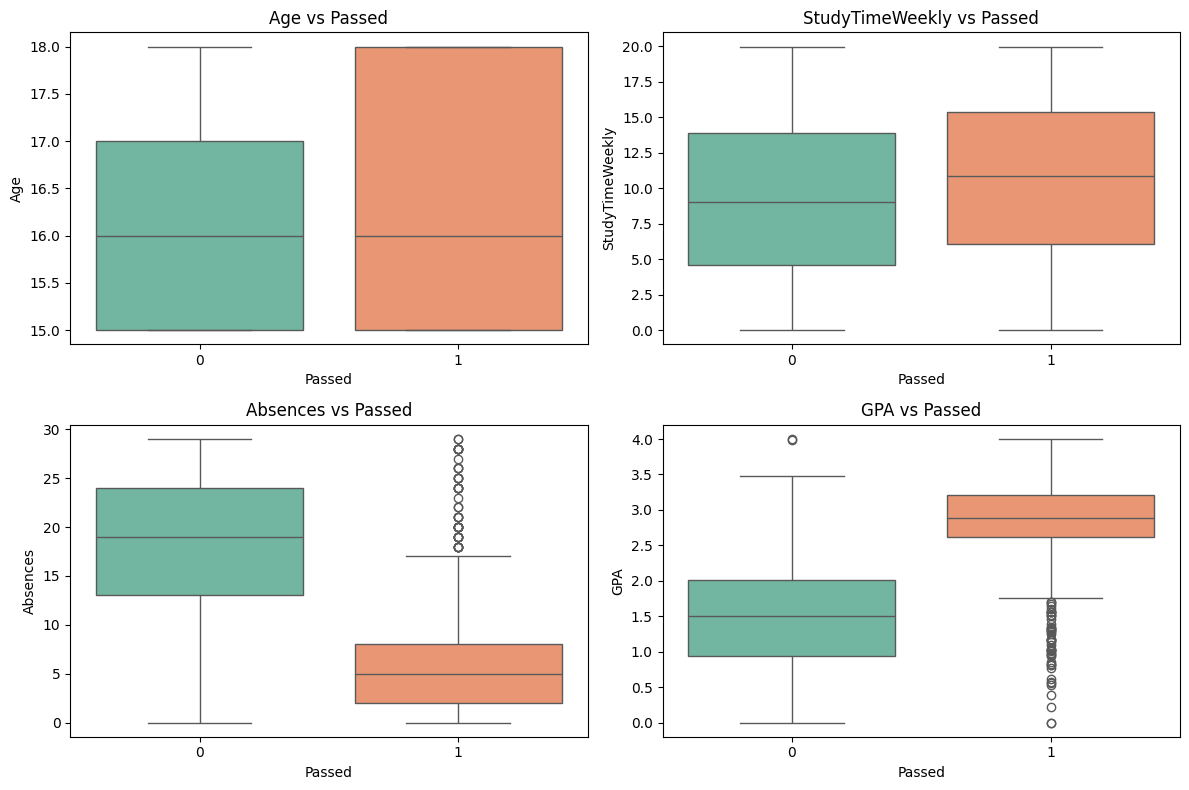

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to show the distribution of numerical features by 'Passed'
numerical_columns = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)  # Adjust subplot grid to match the number of features
    sns.boxplot(x='Passed', y=col, data=data, palette='Set2')
    plt.title(f'{col} vs Passed')
    plt.xlabel('Passed')  # Label the x-axis
    plt.ylabel(col)      # Label the y-axis

plt.tight_layout()
plt.show()

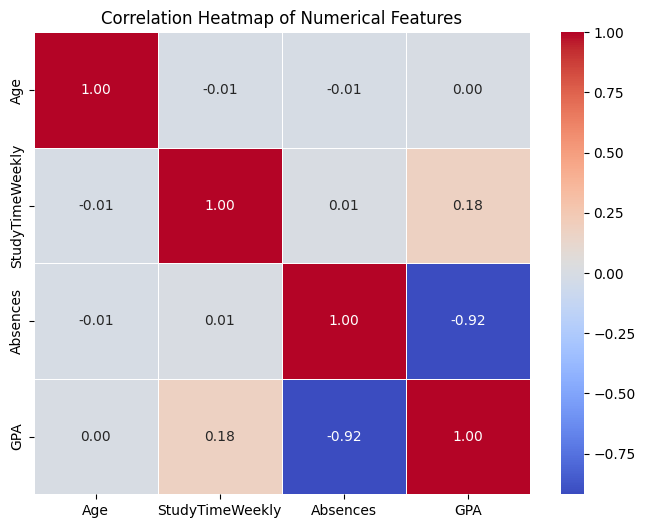

In [23]:
# Correlation heatmap of numerical features
corr_matrix = data[numerical_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [24]:
le = LabelEncoder()
categorical_columns = ['Gender', 'Ethnicity', 'ParentalEducation', 'ParentalSupport']
for col in categorical_columns:
    X[col] = le.fit_transform(X[col])

# Scale features if needed
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [25]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Initialize ensemble models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)


In [26]:
# Train models
rf.fit(X_train, y_train)
ada.fit(X_train, y_train)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [27]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Evaluate each model
print("\nRandom Forest Evaluation:")
evaluate_model(rf, X_test, y_test)

print("\nAdaBoost Evaluation:")
evaluate_model(ada, X_test, y_test)

print("\nGradient Boosting Evaluation:")
evaluate_model(gb, X_test, y_test)
from sklearn.model_selection import cross_val_score
models = {'Random Forest': rf, 'AdaBoost': ada, 'Gradient Boosting': gb}

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5)
    print(f"{name} Mean CV Accuracy: {scores.mean():.4f}")


Random Forest Evaluation:
Accuracy: 1.0
Confusion Matrix:
[[325   0]
 [  0 154]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       325
           1       1.00      1.00      1.00       154

    accuracy                           1.00       479
   macro avg       1.00      1.00      1.00       479
weighted avg       1.00      1.00      1.00       479


AdaBoost Evaluation:
Accuracy: 1.0
Confusion Matrix:
[[325   0]
 [  0 154]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       325
           1       1.00      1.00      1.00       154

    accuracy                           1.00       479
   macro avg       1.00      1.00      1.00       479
weighted avg       1.00      1.00      1.00       479


Gradient Boosting Evaluation:
Accuracy: 1.0
Confusion Matrix:
[[325   0]
 [  0 154]]
Classification Report:
              precision    recal